In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

tf.random.set_seed(0)

In [84]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

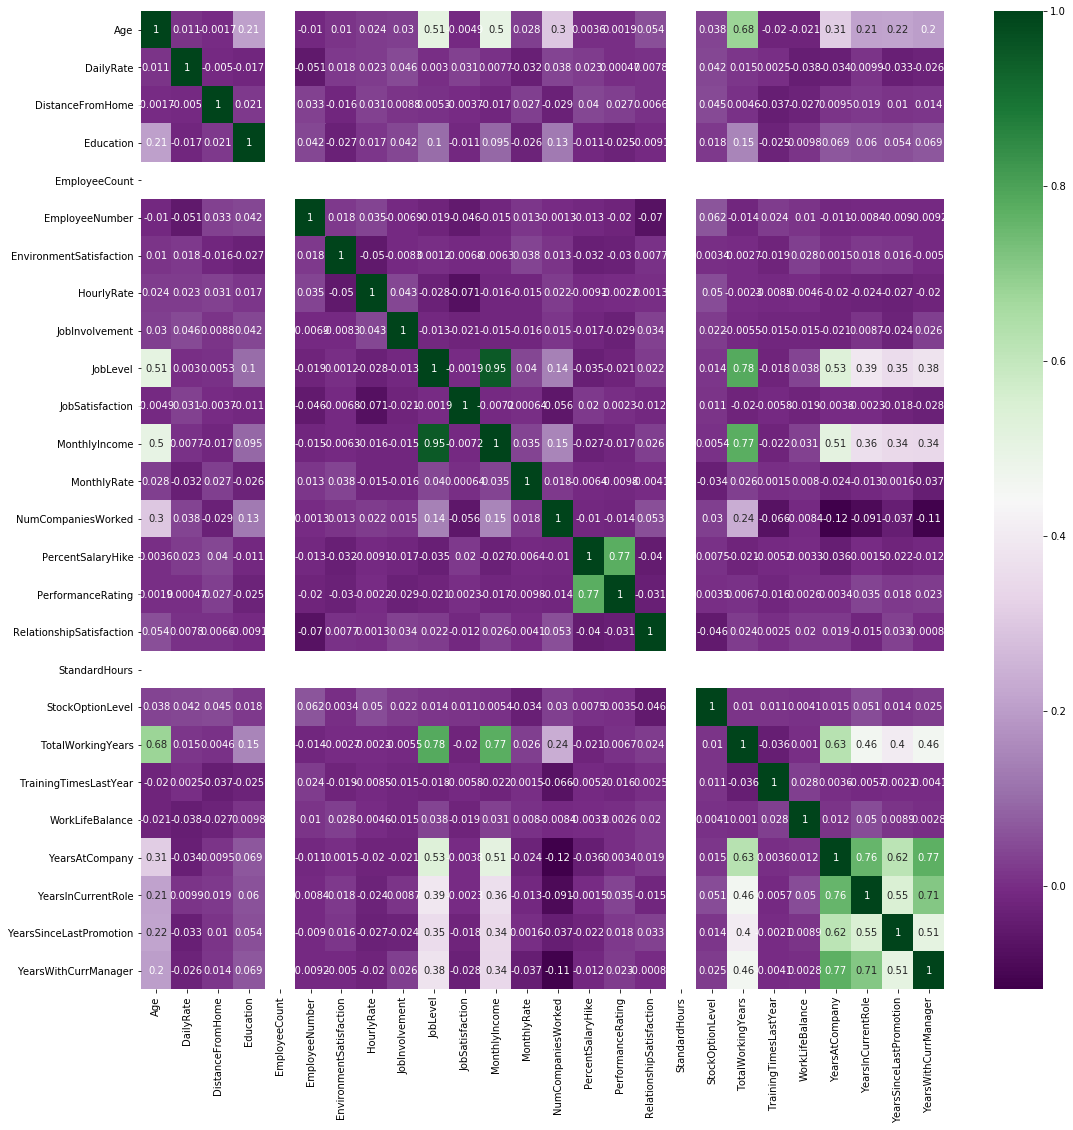

In [85]:
corrMatrix = hr.corr()
#fig=plt.gcf()
#fig.set_size_inches(20,10)
plt.subplots(figsize = (18,18))
sns.heatmap(corrMatrix, annot = True, cmap = "PRGn")

In [86]:
# Drop unimportant variables
hr = hr.drop(['Over18', 
              'EmployeeCount',
              'EmployeeNumber',
              'StandardHours'
             ], axis = 1)

In [87]:
# Creating dummy variables
from sklearn.preprocessing import LabelEncoder

for column in hr.columns:
    if hr[column].dtype == np.number:
        continue
    hr[column] = LabelEncoder().fit_transform(hr[column])

In [88]:
hr['Age_new'] = hr['Age']
hr = hr.drop('Age', axis = 1)

In [94]:
train = hr.sample(frac=0.75, random_state=0)
test = hr.drop(train.index)

In [95]:
# Split data
train_label = train.pop('Attrition')
test_label = test.pop('Attrition')


In [96]:
# building the model
def build_model():
  model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=(30,)),
    layers.Dropout(0.1),
    layers.Dense(1, activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [97]:
model = build_model()

In [99]:
EPOCHS = 200

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  train_data, train_label,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, tfdocs.modeling.EpochDots()]) # validation split for 50/50 split needs to be 0.2

ValueError: Input arrays should have the same number of samples as target arrays. Found 735 input samples and 1102 target samples.

In [ ]:
model.evaluate(test, test_label, verbose = 2)